In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
import pylab
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

train_ini_00 = pd.read_csv("./stock_train_data_20170923.csv", sep=',', delimiter=None)
test_ini_00 = pd.read_csv("./stock_test_data_20170923.csv", sep=',', delimiter=None)

In [101]:
from sklearn.preprocessing import normalize

from sklearn import preprocessing

train_ini=train_ini_00.copy(deep=True)
test_ini=test_ini_00.copy(deep=True)

for i in range(1,89,1):
    train_ini.iloc[:,i]=preprocessing.scale(train_ini.iloc[:,i])
    test_ini.iloc[:,i]=preprocessing.scale(test_ini.iloc[:,i]) 

In [122]:
weightmean=train_ini.iloc[:,89].mean()

In [103]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'], loc='upper left')
    plt.show()

In [123]:
weightmean

3.986947153702753

In [125]:
np.array(train['weight']/weightmean)

array([ 1.00327389,  0.75245542,  1.75572932, ...,  1.25409237,
        0.25081847,  0.25081847])

In [126]:
test_save=[]
for BIGI in range(0,28,1):

    testxx=test_ini.sort_values('group')
    testxx_list = []
    for i in range(len(testxx.group.unique())):
        testxx_list.append(testxx[testxx['group']==i+1])
    test=testxx_list[BIGI]

    trainxx=train_ini.sort_values('group')
    df_list = []
    for i in range(len(trainxx.group.unique())):
        df_list.append(trainxx[trainxx['group']==i+1])
    train=df_list[BIGI]

    model = Sequential()
    model.add(Dense(units=50,input_dim=88,kernel_initializer='normal',activation='relu'))
    model.add(Dense(units=20, activation='sigmoid'))

    trainx=train.copy(deep=True)
    testx=test.copy(deep=True)
    trainx.drop(['id', 'weight', 'label', 'era', 'group'],  axis=1, inplace=True )
    testx.drop(['id', 'group'], axis=1, inplace=True)
    
    x_Train_normalize = trainx.as_matrix()
    x_Test_normalize = testx.as_matrix()
    y_Train_Onehot_temp=train['label'].as_matrix()
    
    # Create label used for validation
    label_mat=train['label'].as_matrix()
    labels = [[1, 0] if label_mat[i] == 0 else [0, 1] for i in range(len(label_mat))]
    model.add(Dense(units=2,kernel_initializer='normal',activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])




    train_history=model.fit(x=x_Train_normalize,y=labels,validation_split=0.4,
                            sample_weight=np.array(train['weight']/weightmean), 
                            epochs=10, batch_size=40, verbose=2)
    prediction=model.predict_classes(x_Test_normalize)
    proba=model.predict_proba(x_Test_normalize)[:,1];
    
    test = test.assign(proba=(pd.Series(proba)).values)
    test.drop(test.columns[1:90],  axis=1, inplace=True )

    test_save.append(test)
    
    print(model.summary())

Train on 6483 samples, validate on 4322 samples
Epoch 1/10
0s - loss: 0.6565 - acc: 0.5067 - val_loss: 0.6567 - val_acc: 0.4940
Epoch 2/10
0s - loss: 0.6435 - acc: 0.5261 - val_loss: 0.6566 - val_acc: 0.4961
Epoch 3/10
0s - loss: 0.6237 - acc: 0.5562 - val_loss: 0.6633 - val_acc: 0.5220
Epoch 4/10
0s - loss: 0.6054 - acc: 0.5854 - val_loss: 0.6642 - val_acc: 0.5310
Epoch 5/10
0s - loss: 0.5919 - acc: 0.5951 - val_loss: 0.6827 - val_acc: 0.5282
Epoch 6/10
0s - loss: 0.5797 - acc: 0.6051 - val_loss: 0.6812 - val_acc: 0.5412
Epoch 7/10
0s - loss: 0.5689 - acc: 0.6136 - val_loss: 0.6703 - val_acc: 0.5465
Epoch 8/10
0s - loss: 0.5539 - acc: 0.6300 - val_loss: 0.6851 - val_acc: 0.5423
Epoch 9/10
0s - loss: 0.5503 - acc: 0.6241 - val_loss: 0.6807 - val_acc: 0.5412
Epoch 10/10
0s - loss: 0.5352 - acc: 0.6357 - val_loss: 0.6870 - val_acc: 0.5430
5888/7106 [=======================>......] - ETA: 0s_________________________________________________________________
Layer (type)                 Outp

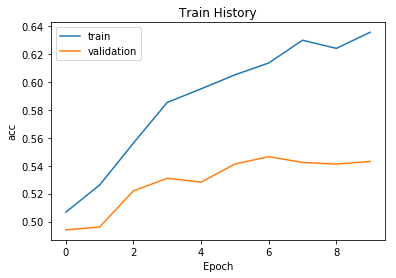

In [127]:
show_train_history(train_history,'acc','val_acc')

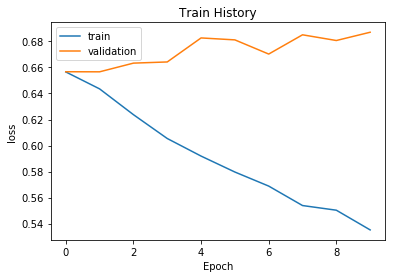

In [128]:
show_train_history(train_history,'loss','val_loss')

In [108]:
#output and save it

result = pd.concat(test_save)
result = result.sort_values('id');
result.to_csv("answer0916.csv", sep=',', encoding='utf-8')

In [109]:
result

,id,proba
10,296114,0.274826
17,296121,0.630054
39,296143,0.523555
59,296163,0.860920
147,296251,0.592742
186,296290,0.526093
221,296325,0.554894
234,296338,0.725277
243,296347,0.219134
255,296359,0.768725
